# 2020년 카드 사용 내역 분석 with TF-IDF

### 비용 History 가 담겨있는 .xls 문서를 .xlsx 문서로 변환

In [1]:
'''
.xls 문서가 pandas 로 open 했더니 에러가 발생했다.
XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'\r\n\r\n\r\n\r\n'

구글링 좀 해 보니, 방법이 없는 것 같다.
xlsx 로 변환을 하면 잘 되니, xlsx 로 변환을 하고 해야함
'''
import win32com.client as win32

for i in range(2, 13, 1):
    fname = f'D:\\dl_data\\Expense_History_2020\\Expense_2020{i:02d}.xls'
    print(fname)
    excel = win32.gencache.EnsureDispatch('Excel.Application')
    excel.DisplayAlerts = False
    wb = excel.Workbooks.Open(fname)
    wb.SaveAs(fname+"x", FileFormat=51) # FileFormat = 51 is for .xlsx extension, 56 is .xls extension
    wb.Close()
    excel.Application.Quit()

D:\dl_data\Expense_History_2020\Expense_202002.xls
D:\dl_data\Expense_History_2020\Expense_202003.xls
D:\dl_data\Expense_History_2020\Expense_202004.xls
D:\dl_data\Expense_History_2020\Expense_202005.xls
D:\dl_data\Expense_History_2020\Expense_202006.xls
D:\dl_data\Expense_History_2020\Expense_202007.xls
D:\dl_data\Expense_History_2020\Expense_202008.xls
D:\dl_data\Expense_History_2020\Expense_202009.xls
D:\dl_data\Expense_History_2020\Expense_202010.xls
D:\dl_data\Expense_History_2020\Expense_202011.xls
D:\dl_data\Expense_History_2020\Expense_202012.xls


### 엑셀문서들에서 원하는 컬럼만 빼서 하나의 데이터로 구성 for TF-IDF

In [2]:
# 1개 파일 테스트
import pandas as pd

efile = pd.read_excel('D:/dl_data/Expense_History_2020/Expense_202002.xlsx', header=2)
# print(efile.head())

In [3]:
print(efile['상호'].tolist())

['(주)후니드분당휴게점', '(주)후니드분당휴게점', '블루샹하이', '스타벅스커피코리아', '서울아산병원 별관', '돼지네', '스타벅스커피코리아', '블루샹하이', 'GS수퍼분당정자점', '정자한방삼계탕', 'GS수퍼분당정자점', '수내칡냉면', '송탄이서방부대찌개', '오모리 찌개', '더진국분당정자역점', '송탄이서방부대찌개', '서울복집', '옥션', '(주)파리크라상분당정자점', '(주)후니드분당휴게점', '에머이분당정자점', '에머이분당정자점', '라무진 분당정자점', '삼김(여의도역점)', '정자골', '(주)후니드SK하이닉스분당카', '누구나 홀딱 반한 닭 분당정자역점', '스타벅스커피코리아', '스타벅스커피코리아', '박서방순대국', '짱수양꼬치앤짬뽕', '티머니개인택시1', '쏘렐라', '결제_KCP', '최진미부대찌개와김치찌개', '알로카시아 인더테라스 경희대점']


In [4]:
from pandas.core.common import flatten

# 11 개 파일에서 상호명만 추출
stores = []

for i in range(2, 13, 1):
    fname = f'D:\\dl_data\\Expense_History_2020\\Expense_2020{i:02d}.xlsx'
    efile = pd.read_excel(fname, header=2)
    # print(efile.head())
    # print(efile['상호'])
    stores.append(efile['상호'].tolist())
stores_all = list(flatten(stores))

In [5]:
stores_len = len(stores_all)
stores_len

1021

### TF-IDF 작업

In [6]:
import nltk
nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\09584\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
import re

cv = TfidfVectorizer(max_features=stores_len) # 사전은 stores_len 개 단어만 
tdm = cv.fit_transform(stores_all)

In [8]:
len(stores_all), tdm

(1021,
 <1021x441 sparse matrix of type '<class 'numpy.float64'>'
 	with 1393 stored elements in Compressed Sparse Row format>)

In [9]:
import numpy
import operator
words = cv.get_feature_names() # 단어 사전 추출
count_mat = tdm.sum(axis=0) # 단어별 합산
count = numpy.squeeze(numpy.asarray(count_mat)) # squeeze 로 차원을 하나 압축

word_count = list(zip(words, count)) # dictionary 하나 만들고
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True) # score 가 높은 것을 맨 위로 정렬

In [10]:
count_mat.shape

(1, 441)

In [11]:
count_mat        # 숫자가 높을수록 중요한 단어

matrix([[ 0.70710678,  1.        ,  4.07253889,  1.        ,  1.        ,
          0.5       ,  1.87985043,  2.35252566,  0.67939513,  8.73574023,
          0.5       ,  1.15470054,  1.        ,  0.70710678,  0.57735027,
          0.70710678,  2.82842712,  1.15470054,  0.57735027,  1.15470054,
          0.70710678,  0.70710678,  2.        ,  1.        ,  1.15470054,
          1.        ,  5.        ,  0.57735027,  0.57735027,  0.5       ,
          1.1936625 ,  1.1936625 ,  7.07106781,  1.15470054,  3.53553391,
          1.        ,  2.12132034,  0.5       ,  1.        ,  0.57735027,
          1.        ,  0.70710678,  1.41421356,  1.        ,  0.70710678,
          0.70710678,  0.57735027,  0.57735027,  1.41421356,  0.70710678,
          5.        ,  2.        ,  4.66552675,  1.        ,  0.70710678,
          4.        ,  4.94974747,  3.3682027 ,  1.        ,  0.57735027,
          1.        ,  1.        ,  0.57735027,  1.        ,  8.        ,
          6.        ,  1.        ,  2.

In [12]:
word_count

[('스타벅스커피코리아', 51.0),
 ('후니드sk하이닉스분당카', 31.0),
 ('후니드분당휴게점', 30.0),
 ('정자한방삼계탕', 18.0),
 ('정자점', 17.74020901729863),
 ('분당정자점', 16.650819565385575),
 ('내린그림', 16.0),
 ('분당정자역점', 12.897120453011157),
 ('정자역점', 12.738179595262451),
 ('입이즐거운곳락', 12.72792206135786),
 ('주식회사', 12.72792206135786),
 ('문화비', 10.906409949733305),
 ('수내칡냉면', 10.0),
 ('오리지날', 10.0),
 ('퀴즈노스', 9.111824775854936),
 ('매취랑', 9.0),
 ('삼김화로구이', 9.0),
 ('서울복집', 9.0),
 ('정자골', 9.0),
 ('참치공방', 9.0),
 ('투썸플레이스', 8.832498994250377),
 ('_이니시스', 8.73574022831769),
 ('금성중식당', 8.0),
 ('박서방순대국', 8.0),
 ('아빠곰탕', 8.0),
 ('커피부케', 8.0),
 ('지유가오카브레드', 7.526909484970641),
 ('커피에반하다', 7.263296942632689),
 ('somecoffee', 7.071067811865477),
 ('썸커피', 7.071067811865477),
 ('더진국분당정자역점', 7.0),
 ('쏘렐라', 7.0),
 ('안래홍', 7.0),
 ('에이벨', 7.0),
 ('이디야커피', 7.0),
 ('헬로우', 7.0),
 ('호천당', 7.0),
 ('홍콩반점0410분당정자점', 7.0),
 ('컴포즈커피', 6.535533905932738),
 ('마트', 6.363961030678928),
 ('후니드', 6.363961030678928),
 ('김명자굴국밥전문점', 6.0),
 ('블루샹하이', 6.0),
 ('상해완탕'

### WordCloud 생성

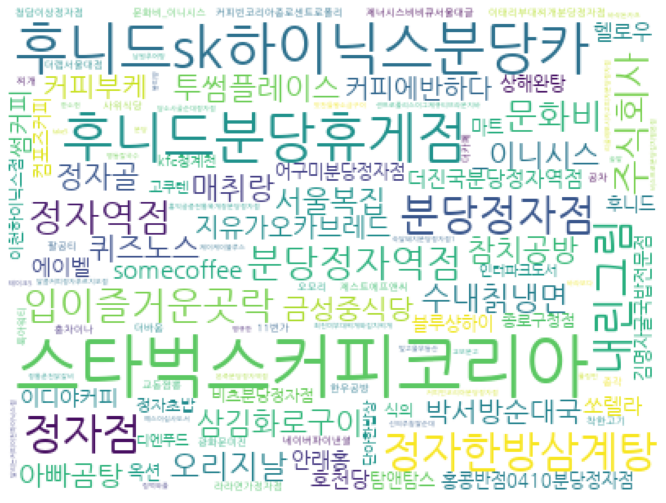

In [13]:
%matplotlib inline
from matplotlib import pyplot
from wordcloud import WordCloud
wc = WordCloud(font_path='C:\\Windows\\Fonts\\NanumGothic.ttf', background_color='white', width=400, height=300)
cloud = wc.fit_words(dict(word_count))

pyplot.figure(figsize=(12,9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()